In [ ]:
"""
Instalando a biblioteca necessária para o uso do código, cu124 é a versão mais recente, a versão da minha GPU é 13.0 mas não extsrem modelos CUDA 130, então pegarei o mais recente
"""
%pip install -q torch torchvision --index-url https://download.pytorch.org/whl/cu124

"""
Tempo médio de demora para download : 5 minutos.
"""
%pip install -q diffusers transformers accelerate pillow requests


In [9]:
"""
Importes necessários para a utilização do código
"""
import torch                                                #Fundamental para o DeepLearning
from diffusers import StableDiffusionImg2ImgPipeline        #Esta classe é um pipeline completo que encapsula o fluxo de trabalho
from diffusers.utils import load_image                      #Importa uma função de utilidade para carregar facilmente imagens a partir de URLs ou caminhos de arquivo.
from PIL import Image                                       #Importa a biblioteca Pillow (PIL), que é o padrão em Python para manipulação
from IPython.display import display

In [3]:
# Vamos definir que o processamento vai ser na placa de vídeo (GPU Nvidia)

device = "cuda" 

# Definimos qual modelo será usado

model = "runwayml/stable-diffusion-v1-5"

#Carrega o modelo
#A escolha do float16 é para que o modelo use 16 bits ao invés de 32, deixando-o mais leve, sem perder muita qualidade

pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model, torch_dtype=torch.float16)

#Move de fato o modelo da CPU para a GPU

pipe = pipe.to(device)

c:\Users\igorg\AppData\Local\Programs\Python\Python313\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\igorg\.cache\huggingface\hub\models--runwayml--stable-diffusion-v1-5. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]Xet Storage is enabled for

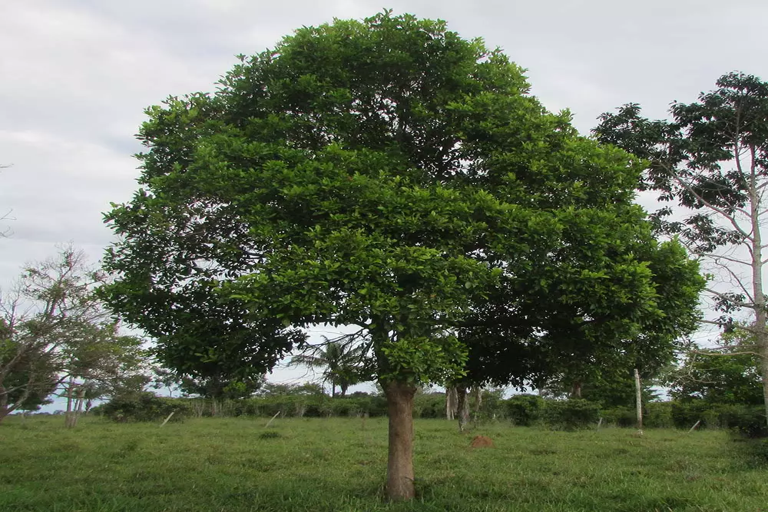

In [15]:
image_path = "C:\\Users\\igorg\\Documents\\PDSI\\imagens\\Imagem1.webp"

#reformulamos o tamanho da imgem por que o Stable Diffusion trabalha melhor com dimensões múltiplos de 8

image = load_image(image_path).resize((768,512))

display(image)

In [7]:
# Definimos o prompt para a mudança da imagem

prompt = "make that tree on fire"

generator = torch.Generator(device=device).manual_seed(1024)

#strenght = quanta liberdade a IA tem
#guidance_scale = define quanto a IA tem que obedecer seu prompt

image = pipe(prompt=prompt, image=image, strength=0.75, guidance_scale=7.5, generator=generator).images[0]

image.save("Teste1.png")

100%|██████████| 37/37 [00:12<00:00,  2.94it/s]


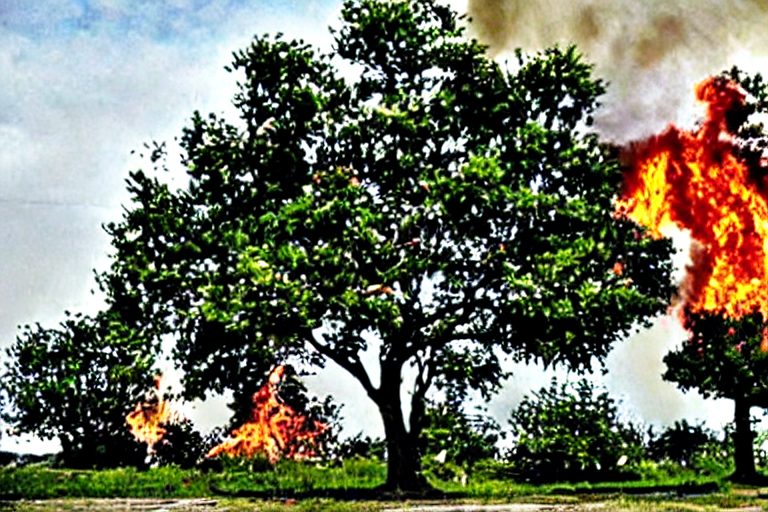

In [14]:
display(image)